In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
# Load the CSV data
data = pd.read_csv('data/player_history.csv')

# Check the shape of the DataFrame
print('Data shape:', data.shape)

# Display the first few rows
print(data.head())

# Check for missing values
print('Missing values:\n', data.isnull().sum())


Data shape: (90, 9)
   player_id  gameweek  form  average_points   xG   xA  average_minutes  \
0        201         1   3.8            0.00  0.0  0.0              0.0   
1        201         2   3.8            2.00  0.0  0.0             90.0   
2        201         3   3.8            1.50  0.0  0.0             90.0   
3        201         4   3.8            2.33  0.0  0.0             90.0   
4        201         5   3.8            2.00  0.0  0.0             90.0   

   fixture_difficulty  actual_points  
0                   3              2  
1                   3              1  
2                   3              4  
3                   3              1  
4                   3              9  
Missing values:
 player_id             0
gameweek              0
form                  0
average_points        0
xG                    0
xA                    0
average_minutes       0
fixture_difficulty    0
actual_points         0
dtype: int64


In [12]:
# No need to drop missing values if there aren't any
# data = data.dropna()

# Define features and target variable
features = data[['form', 'average_points', 'xG', 'xA', 'average_minutes', 'fixture_difficulty']]
target = data['actual_points']

# Ensure data types are correct
numeric_columns = features.columns.tolist() + ['actual_points']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verify that there are no missing values after conversion
print('Missing values after type conversion:\n', data[numeric_columns].isnull().sum())


Missing values after type conversion:
 form                  0
average_points        0
xG                    0
xA                    0
average_minutes       0
fixture_difficulty    0
actual_points         0
dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

In [14]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Absolute Error: 3.86


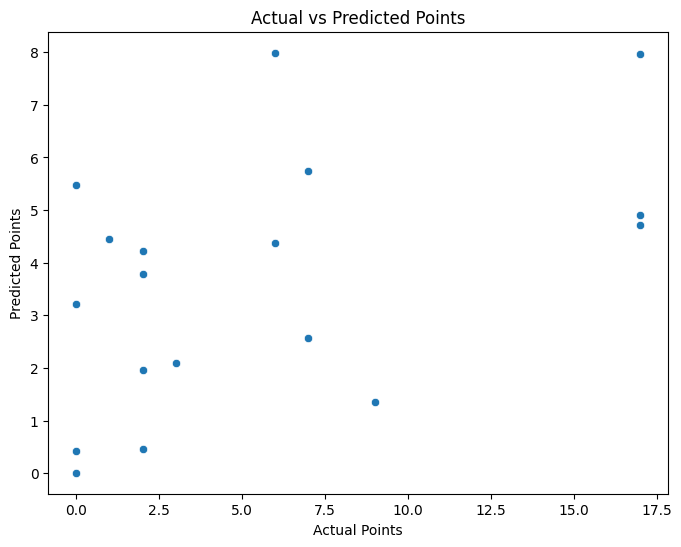

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()

In [16]:
# Save the model to a file
joblib.dump(model, 'model/fpl_model.pkl')

['model/fpl_model.pkl']